<h4>Tarefa 1 -  Pratica EDA</h4>

O dataset de Censo Adulto é uma base de dados que contém informações demográficas de adultos, extraídas de um censo. Ele serve para responder a uma pergunta de negócio muito comum: se uma pessoa com certas características (idade, educação, ocupação) tem uma alta renda (acima de $50.000) ou uma baixa renda (abaixo ou igual a $50.000).

O que o dataset representa?
Ele é como uma fotografia da sociedade, com dados anônimos sobre as pessoas. A variável que você vai tentar prever (income) é a renda anual de cada indivíduo, categorizada em dois grupos. Os outros dados são as variáveis que você usará para fazer essa previsão.

Onde encontrar mais informações?
Você encontra informações detalhadas sobre o dataset no repositório da UCI (University of California, Irvine), a fonte original. É muito importante consultar essa documentação para entender cada coluna.

Link principal do Dataset: https://archive.ics.uci.edu/dataset/2/adult

Nesse link, você vai encontrar um arquivo chamado adult.names que explica cada coluna em detalhes, incluindo o que cada valor categórico significa. Esse arquivo é como o "manual de instruções" do seu dataset e será fundamental para o seu projeto.

## 1. Importação e visualização inicial

Nesta primeira etapa eu importo as bibliotecas, carrego o dataset Censo Adulto a partir do arquivo local e faço uma visão geral do formato dos dados e das primeiras linhas. Essa inspeção inicial me ajuda a conferir se o arquivo foi lido corretamente e se as colunas correspondem à descrição do arquivo "adult.names".

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display

sns.set(style="whitegrid")

# Caminho para o arquivo local.
# O nome do arquivo deve ser exatamente o que você salvou.
file_path = 'data/adult.data'

# As colunas do dataset, já que o arquivo não tem um cabeçalho
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Dicionário de dados explicativo para cada coluna
data_dict = {
    'age': 'Idade do indivíduo.',
    'workclass': 'Categoria de emprego (ex: Private, Self-emp-not-inc, etc.).',
    'fnlwgt': 'O peso estatístico final. Representa quantas pessoas a amostra representa.',
    'education': 'Nível de escolaridade do indivíduo.',
    'education-num': 'Número que representa o nível de escolaridade.',
    'marital-status': 'Estado civil do indivíduo.',
    'occupation': 'Tipo de ocupação (ex: Exec-managerial, Tech-support, etc.).',
    'relationship': 'Relação do indivíduo na família (ex: Husband, Not-in-family, etc.).',
    'race': 'Raça do indivíduo.',
    'sex': 'Gênero (Male ou Female).',
    'capital-gain': 'Ganhos de capital.',
    'capital-loss': 'Perdas de capital.',
    'hours-per-week': 'Número de horas trabalhadas por semana.',
    'native-country': 'País de origem do indivíduo.',
    'income': 'Se a renda do indivíduo é >50K ou <=50K. (Variável alvo).'
}

# Carregando o dataset a partir do arquivo local.
# É crucial que o arquivo esteja na pasta correta.
df = pd.read_csv(file_path, header=None, names=columns, na_values='?', skipinitialspace=True)

# Ajustando possíveis espaços em branco na variável alvo
df['income'] = df['income'].str.strip()

In [ ]:
# Exibindo o dicionário de dados
print("### Dicionário de Dados ###")
for key, value in data_dict.items():
    print(f"- **{key}**: {value}")

### Dicionário de Dados ###
- **age**: Idade do indivíduo.
- **workclass**: Categoria de emprego (ex: Private, Self-emp-not-inc, etc.).
- **fnlwgt**: O peso estatístico final. Representa quantas pessoas a amostra representa.
- **education**: Nível de escolaridade do indivíduo.
- **education-num**: Número que representa o nível de escolaridade.
- **marital-status**: Estado civil do indivíduo.
- **occupation**: Tipo de ocupação (ex: Exec-managerial, Tech-support, etc.).
- **relationship**: Relação do indivíduo na família (ex: Husband, Not-in-family, etc.).
- **race**: Raça do indivíduo.
- **sex**: Gênero (Male ou Female).
- **capital-gain**: Ganhos de capital.
- **capital-loss**: Perdas de capital.
- **hours-per-week**: Número de horas trabalhadas por semana.
- **native-country**: País de origem do indivíduo.
- **income**: Se a renda do indivíduo é >50K ou <=50K. (Variável alvo).


In [ ]:
# Visão inicial do dataset
print("Formato do dataset (linhas, colunas):", df.shape)

print("\nPrimeiras 5 linhas do dataset:")
from IPython.display import display
display(df.head())

print("\nInformações gerais do dataframe:")
df.info()

print("\nEstatísticas descritivas das variáveis numéricas:")
display(df.describe())

print("\nEstatísticas descritivas das variáveis categóricas:")
display(df.describe(include='object'))

Formato do dataset (linhas, colunas): (32561, 15)

Primeiras 5 linhas do dataset:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



Informações gerais do dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Estatísticas descritivas das variáveis numéricas:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000



Estatísticas descritivas das variáveis categóricas:


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


## 2. Análise Exploratória dos Dados (EDA)

Nesta etapa eu investigo mais a fundo o dataset para entender melhor os tipos de variáveis, a presença de valores ausentes, as distribuições das principais colunas e como elas se relacionam com a variável alvo `income`. O objetivo é gerar hipóteses e intuições que vão guiar a preparação dos dados e os futuros modelos de Machine Learning.

### 2.1 Tipos de variáveis

Nesta etapa eu identifico quais colunas são numéricas e quais são categóricas. Isso é importante porque cada tipo de variável exige um tipo de tratamento diferente na preparação dos dados e na escolha dos algoritmos de Machine Learning.

In [ ]:
# Tipos de variáveis
print("Tipos de dados de cada coluna:")
from IPython.display import display

dtypes_df = df.dtypes.to_frame("dtype")
display(dtypes_df)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nColunas numéricas:")
print(numeric_cols)

print("\nColunas categóricas:")
print(categorical_cols)

Tipos de dados de cada coluna:


,dtype
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object



Colunas numéricas:
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

Colunas categóricas:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


Com base nesses tipos de dados, eu considero como **variáveis numéricas** as colunas `age`, `fnlwgt`, `education-num`, `capital-gain`, `capital-loss` e `hours-per-week`. As demais colunas (`workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex`, `native-country` e `income`) eu trato como **variáveis categóricas**.

Essa separação é importante porque:

- Para as variáveis numéricas, eu pretendo avaliar distribuições, outliers e aplicar técnicas de normalização/padronização.
- Para as variáveis categóricas, eu vou focar em frequências, proporções, valores ausentes e, mais à frente, em codificação (one-hot encoding) para uso em modelos de Machine Learning.

### 2.2 Valores ausentes ou inconsistentes

Aqui eu avalio a presença de valores ausentes ou marcadores de dados faltantes (como `?`, que já foram convertidos para `NaN` na leitura do arquivo). Entender em quais colunas esses valores aparecem e em que proporção é fundamental para decidir se vou remover linhas, fazer imputação ou tratar de outra forma.

Valores ausentes por coluna:


,qtd_ausentes,percentual_ausente
occupation,1843,5.660146
workclass,1836,5.638647
native-country,583,1.790486
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
education-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000


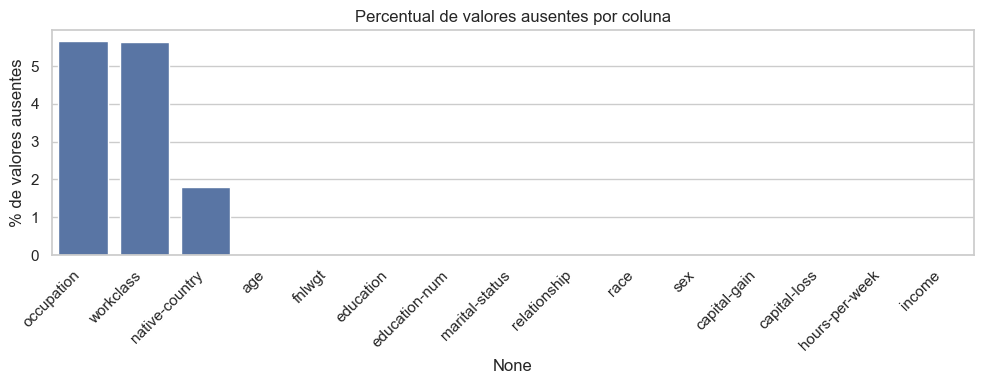

In [ ]:
# Análise de valores ausentes
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'qtd_ausentes': missing_counts,
    'percentual_ausente': missing_percent
}).sort_values('percentual_ausente', ascending=False)

print("Valores ausentes por coluna:")
from IPython.display import display

display(missing_df)

plt.figure(figsize=(10, 4))
sns.barplot(x=missing_df.index, y='percentual_ausente', data=missing_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel('% de valores ausentes')
plt.title('Percentual de valores ausentes por coluna')
plt.tight_layout()
plt.show()

Após executar a célula de valores ausentes, eu observo que os dados faltantes estão concentrados principalmente em colunas categóricas como `workclass`, `occupation` e `native-country`, enquanto as variáveis numéricas praticamente não apresentam ausências.

Como a proporção de valores ausentes é relativamente pequena em relação ao total de registros e está restrita a poucas colunas, eu considero razoável, na etapa de preparação, **remover as linhas com valores ausentes** em vez de aplicar técnicas mais complexas de imputação. Isso simplifica o pipeline de dados sem causar uma perda significativa de informação.

### 2.3 Distribuições das variáveis principais

Agora eu analiso as distribuições das principais variáveis numéricas e categóricas. O objetivo é entender a forma das distribuições (simétrica, assimétrica, com caudas longas), identificar possíveis outliers e ter uma noção de como os indivíduos estão distribuídos em termos de idade, escolaridade, horas trabalhadas por semana, ganhos de capital, perdas de capital, entre outros.

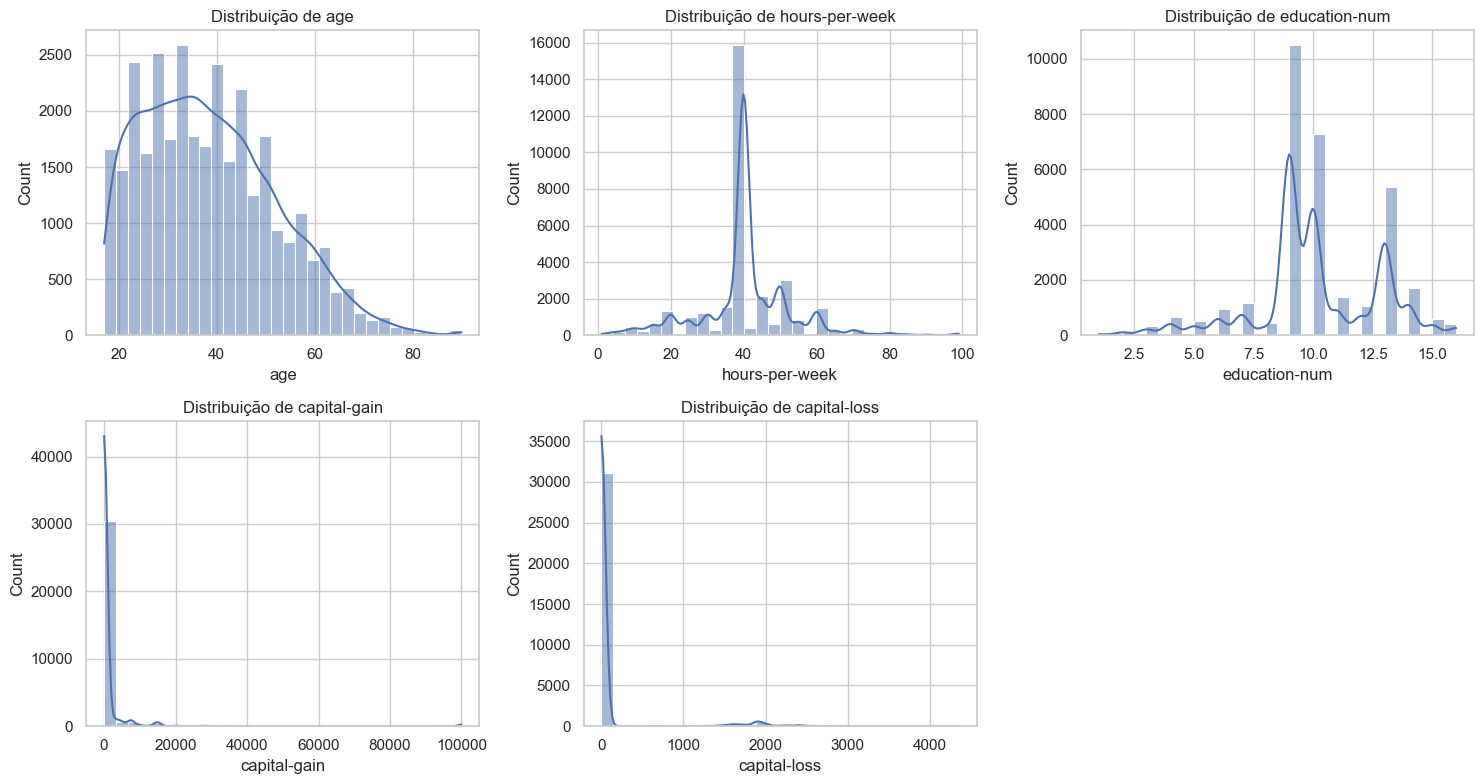

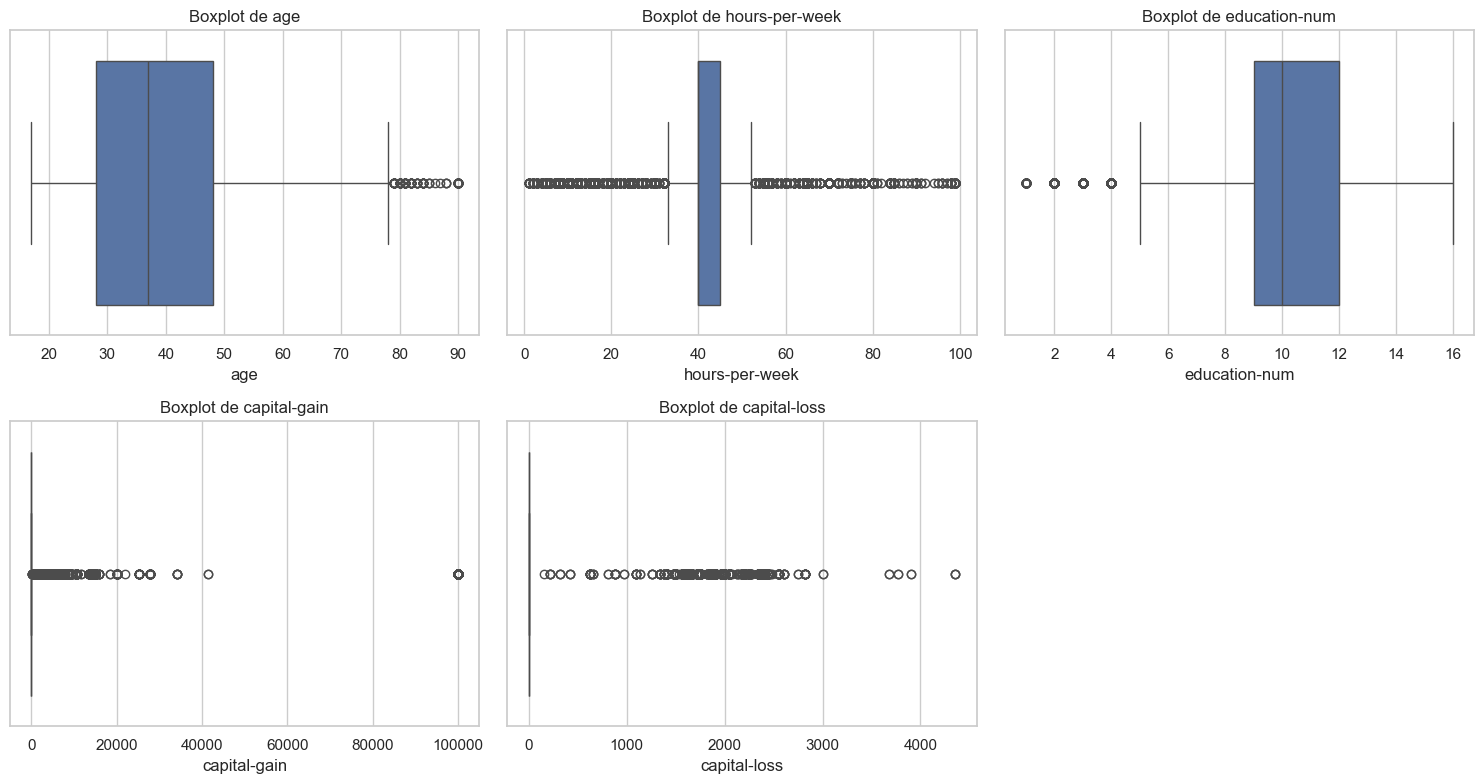

In [ ]:
# Distribuições das variáveis numéricas mais relevantes
numeric_to_plot = ['age', 'hours-per-week', 'education-num', 'capital-gain', 'capital-loss']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

Além das variáveis numéricas, eu também avalio a distribuição de algumas variáveis categóricas, como `education`, `workclass`, `marital-status`, `occupation`, `race`, `sex`, `native-country` e a própria variável alvo `income`. Isso me ajuda a entender quais categorias são dominantes e se há muito desbalanceamento entre classes.

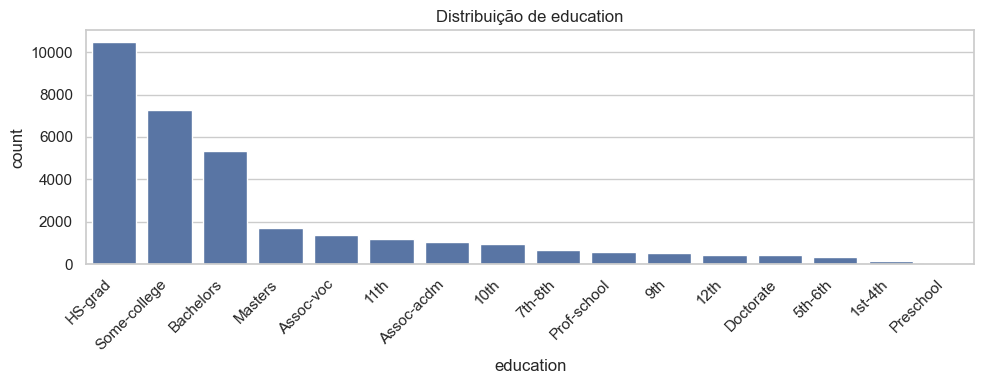

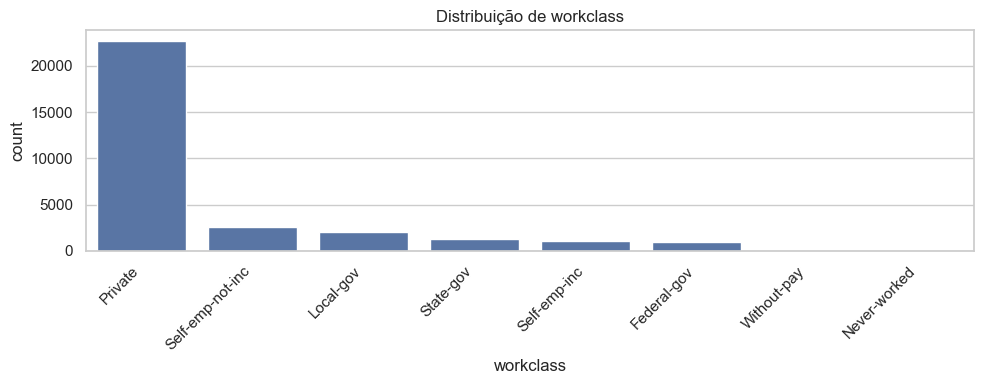

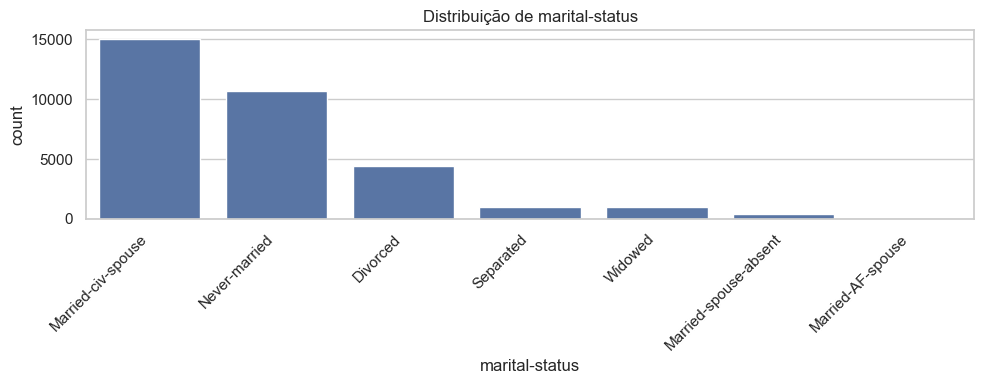

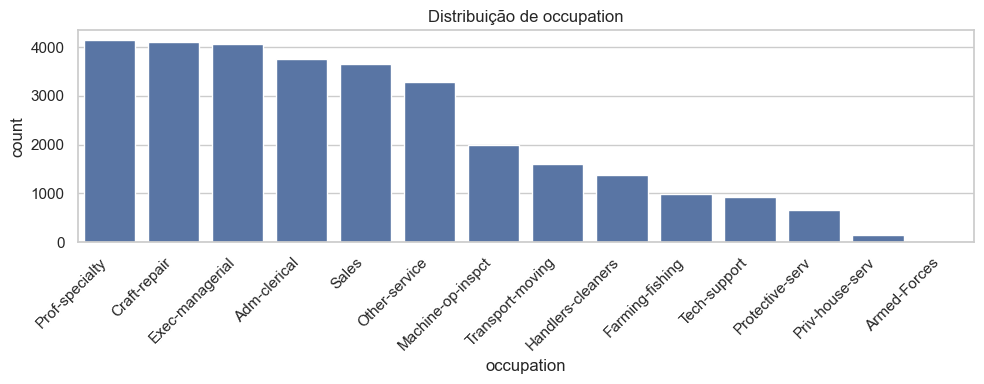

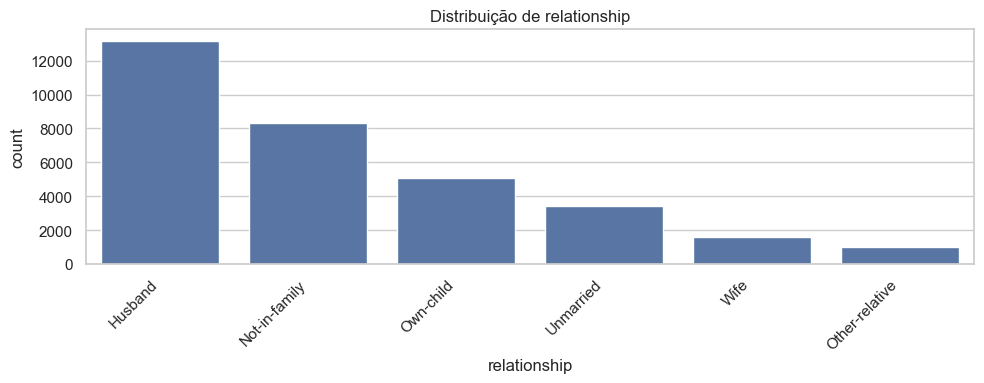

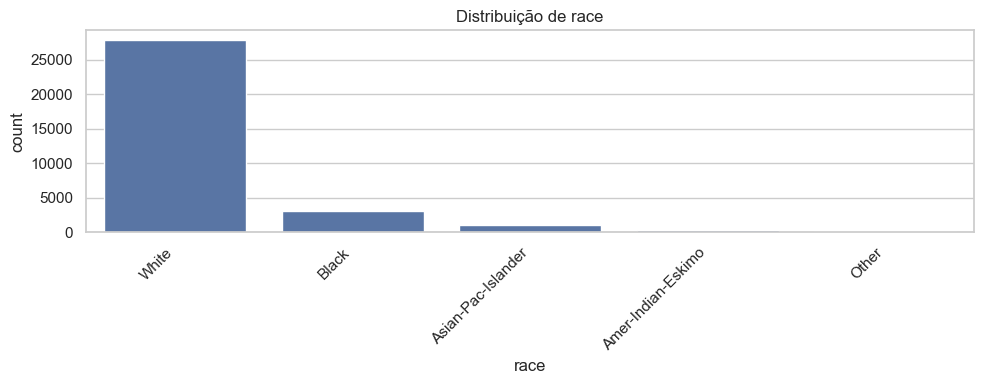

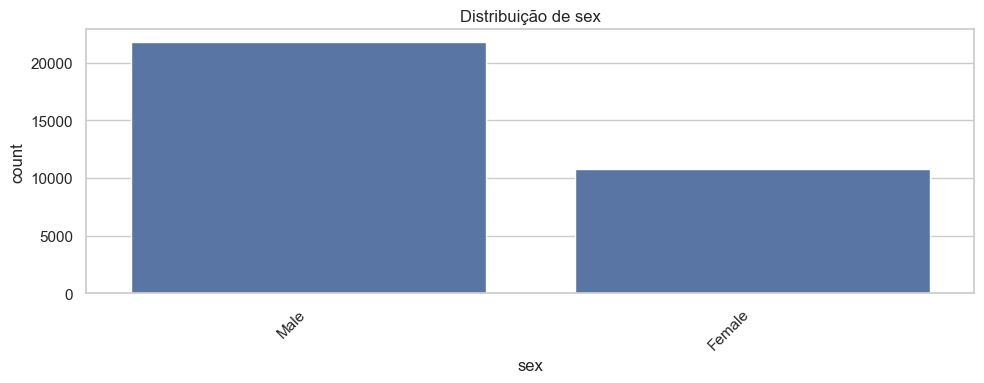

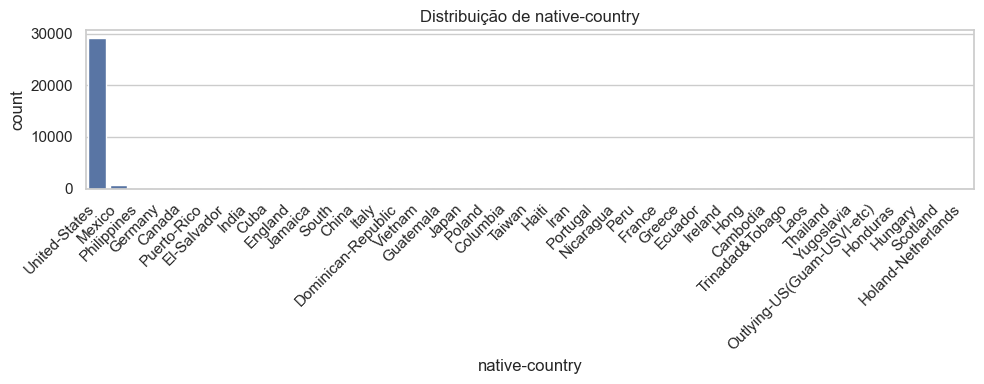

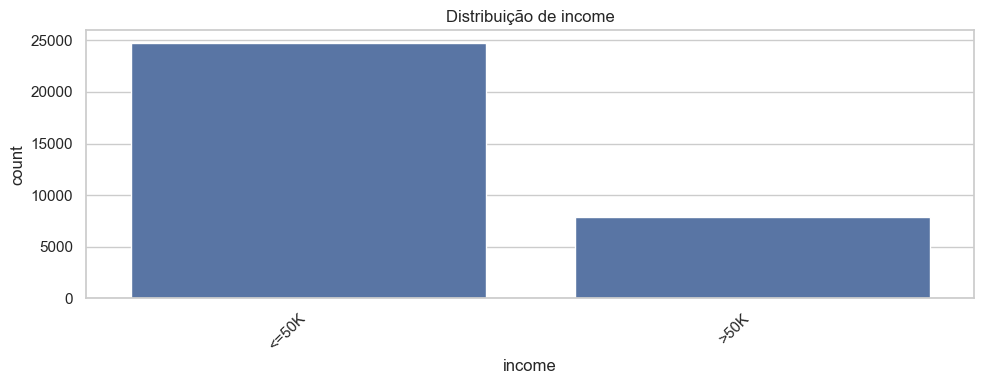

In [ ]:
# Distribuições de algumas variáveis categóricas importantes
categorical_to_plot = ['education', 'workclass', 'marital-status', 'occupation',
                       'relationship', 'race', 'sex', 'native-country', 'income']

for col in categorical_to_plot:
    plt.figure(figsize=(10, 4))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribuição de {col}')
    plt.tight_layout()
    plt.show()

A partir desses gráficos, eu percebo que algumas categorias concentram a maior parte dos registros (por exemplo, poucos níveis de escolaridade e tipos de trabalho aparecem com muita frequência, enquanto outros são bem raros). Isso indica que, ao preparar os dados para modelagem, eu preciso tratar essas categorias raras com cuidado, para evitar que gerem pouco sinal estatístico ou causem problemas em modelos mais sensíveis a sparsidade.

### 2.4 Relação das variáveis com a renda (`income`)

Nesta etapa eu investigo como algumas variáveis explicativas se relacionam com a variável alvo `income` (se a renda é `<=50K` ou `>50K`).

O meu objetivo aqui é:

- Entender quais variáveis parecem ter maior influência na probabilidade de uma pessoa ter **alta renda**.
- Observar padrões em faixas etárias, escolaridade, horas trabalhadas por semana, sexo, tipo de trabalho, etc.
- Gerar hipóteses que serão úteis na etapa de modelagem (por exemplo, quais variáveis têm maior poder preditivo).

Distribuição absoluta de income:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Distribuição relativa de income (%):
income
<=50K    75.92
>50K     24.08
Name: proportion, dtype: float64


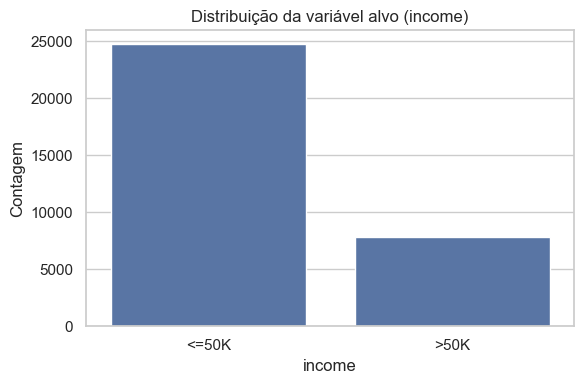

In [ ]:
# Distribuição da variável alvo income
print("Distribuição absoluta de income:")
print(df['income'].value_counts())

print("\nDistribuição relativa de income (%):")
print((df['income'].value_counts(normalize=True) * 100).round(2))

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='income')
plt.title('Distribuição da variável alvo (income)')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

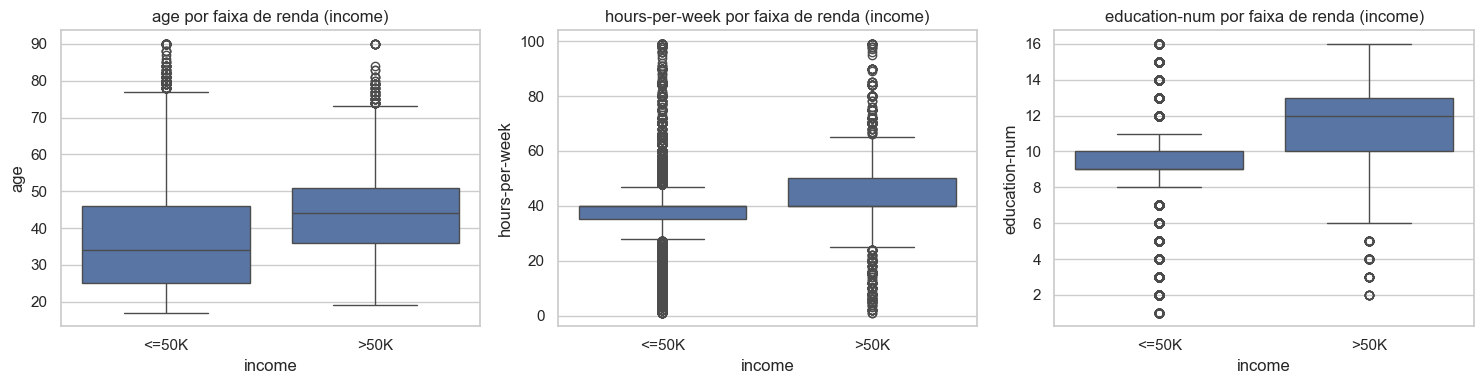

In [ ]:
# Relação entre variáveis numéricas e income
numeric_rel = ['age', 'hours-per-week', 'education-num']

plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_rel, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='income', y=col)
    plt.title(f'{col} por faixa de renda (income)')
plt.tight_layout()
plt.show()


Proporção de renda >50K por categoria de education (top 10):


income,<=50K,>50K
education,,
Doctorate,25.907990,74.092010
Prof-school,26.562500,73.437500
Masters,44.341265,55.658735
Bachelors,58.524743,41.475257
Assoc-voc,73.878437,26.121563
Assoc-acdm,75.164011,24.835989
Some-college,80.976546,19.023454
HS-grad,84.049138,15.950862
12th,92.378753,7.621247


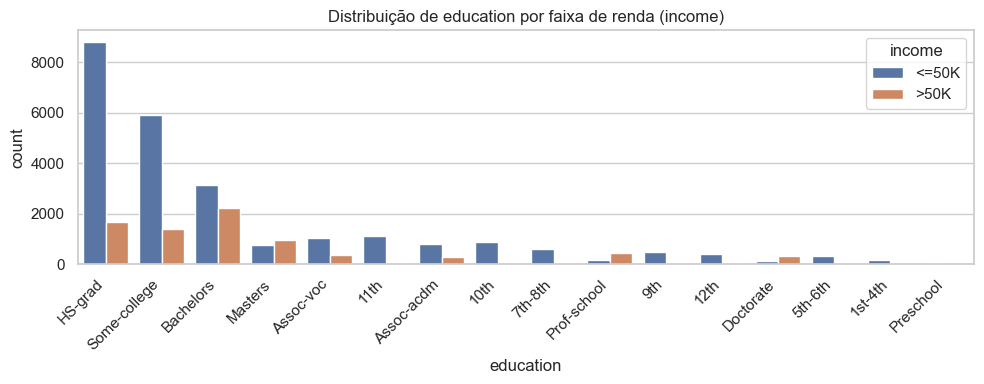


Proporção de renda >50K por categoria de marital-status (top 10):


income,<=50K,>50K
marital-status,,
Married-civ-spouse,55.315171,44.684829
Married-AF-spouse,56.521739,43.478261
Divorced,89.579113,10.420887
Widowed,91.440081,8.559919
Married-spouse-absent,91.866029,8.133971
Separated,93.560976,6.439024
Never-married,95.403913,4.596087


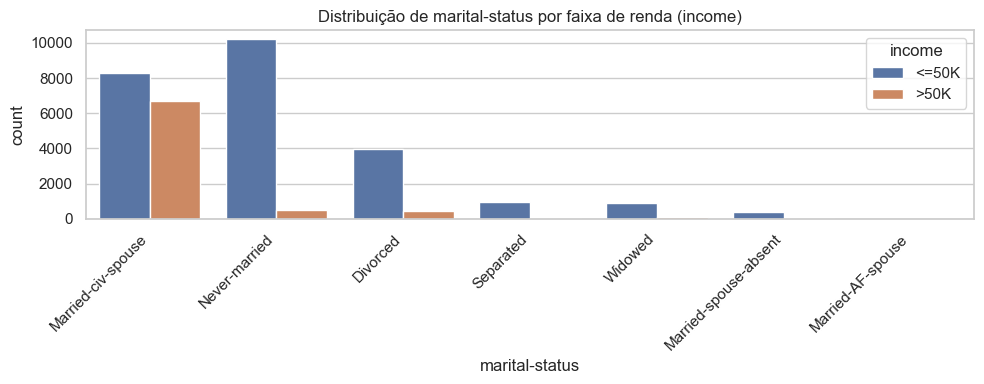


Proporção de renda >50K por categoria de workclass (top 10):


income,<=50K,>50K
workclass,,
Self-emp-inc,44.265233,55.734767
Federal-gov,61.354167,38.645833
Local-gov,70.520784,29.479216
Self-emp-not-inc,71.507281,28.492719
State-gov,72.804314,27.195686
Private,78.132711,21.867289
Never-worked,100.000000,0.000000
Without-pay,100.000000,0.000000


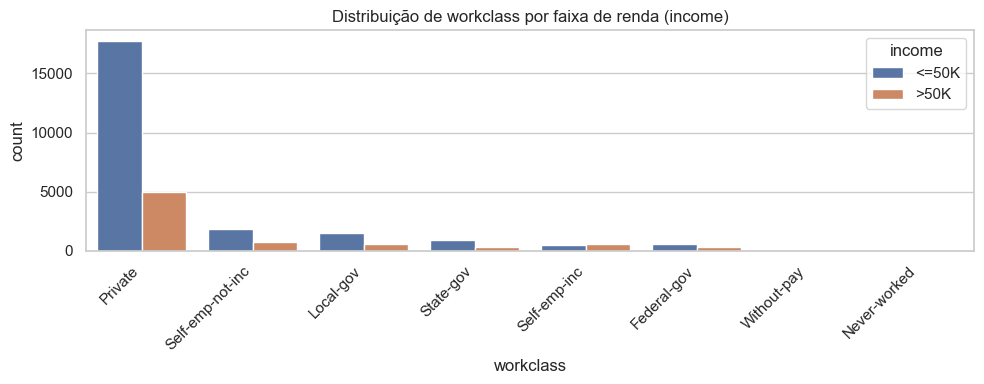


Proporção de renda >50K por categoria de occupation (top 10):


income,<=50K,>50K
occupation,,
Exec-managerial,51.598623,48.401377
Prof-specialty,55.096618,44.903382
Protective-serv,67.488444,32.511556
Tech-support,69.504310,30.495690
Sales,73.068493,26.931507
Craft-repair,77.335936,22.664064
Transport-moving,79.962430,20.037570
Adm-clerical,86.551724,13.448276
Machine-op-inspct,87.512488,12.487512


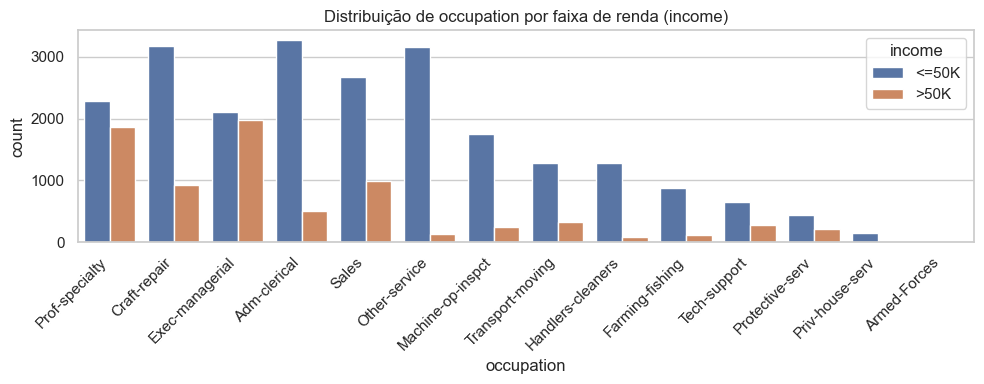


Proporção de renda >50K por categoria de sex (top 10):


income,<=50K,>50K
sex,,
Male,69.426342,30.573658
Female,89.053941,10.946059


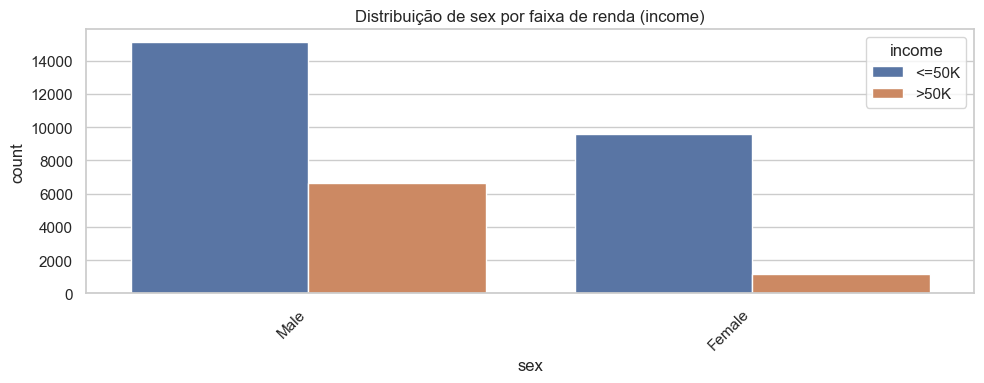

In [ ]:
# Relação entre variáveis categóricas e income
cat_rel = ['education', 'marital-status', 'workclass', 'occupation', 'sex']

for col in cat_rel:
    print(f"\nProporção de renda >50K por categoria de {col} (top 10):")
    ctab = pd.crosstab(df[col], df['income'], normalize='index') * 100
    if '>50K' in ctab.columns:
        ctab = ctab.sort_values('>50K', ascending=False)
    display(ctab.head(10))

    plt.figure(figsize=(10, 4))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, hue='income', order=order)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribuição de {col} por faixa de renda (income)')
    plt.tight_layout()
    plt.show()

Com base nessas análises, eu observo alguns padrões importantes:

- **Idade (`age`)**: a mediana de idade tende a ser maior para pessoas com renda `>50K`, indicando que indivíduos mais velhos têm maior probabilidade de alta renda.
- **Horas trabalhadas por semana (`hours-per-week`)**: quem trabalha mais horas por semana aparece com maior frequência na faixa de renda `>50K`.
- **Escolaridade (`education`, `education-num`)**: níveis mais altos de escolaridade (por exemplo, `Bachelors`, `Masters`, `Doctorate`) apresentam uma proporção maior de renda `>50K`.
- **Estado civil (`marital-status`)**: indivíduos casados (por exemplo, `Married-civ-spouse`) tendem a ter uma proporção maior de alta renda do que solteiros ou divorciados.
- **Tipo de ocupação (`occupation`)**: ocupações de maior qualificação (como `Exec-managerial` e `Prof-specialty`) concentram mais pessoas com renda `>50K`.
- **Sexo (`sex`)**: há um desbalanceamento entre homens e mulheres na faixa de alta renda, com homens aparecendo com maior frequência em `>50K`.

Esses padrões sugerem que variáveis como idade, escolaridade, estado civil, ocupação, horas trabalhadas por semana e sexo provavelmente terão papel importante na modelagem preditiva da renda.

## 3. Preparação dos Dados

Nesta seção eu aplico as principais transformações necessárias para preparar o dataset Censo Adulto para futuros modelos de Machine Learning. As etapas incluem:

- Tratamento de valores ausentes.
- Criação de variáveis derivadas (faixas etárias e faixas de horas trabalhadas).
- Padronização de variáveis numéricas.
- Criação de um conjunto de dados pronto para ser utilizado em modelos supervisionados.

### 3.1 Tratamento de valores ausentes

Com base na análise de valores ausentes, eu decidi **remover as linhas que possuem `NaN`** em qualquer coluna. Essa decisão é razoável porque:

- A porcentagem de valores ausentes é pequena em relação ao total do dataset.
- Os dados faltantes estão concentrados em poucas variáveis categóricas (`workclass`, `occupation`, `native-country`).

Assim, eu priorizo manter apenas registros completos para facilitar o fluxo de preparação e modelagem.

In [ ]:
# Removendo linhas com valores ausentes
df_clean = df.dropna().copy()

print("Formato original do dataset:", df.shape)
print("Formato após remoção de valores ausentes:", df_clean.shape)
print("Quantidade de linhas removidas:", df.shape[0] - df_clean.shape[0])

Formato original do dataset: (32561, 15)
Formato após remoção de valores ausentes: (30162, 15)
Quantidade de linhas removidas: 2399


### 3.2 Criação de variáveis derivadas

Para enriquecer o dataset e capturar relações não lineares, eu crio algumas variáveis derivadas a partir das originais. Em especial, eu agrupo:

- **Idade (`age`)** em faixas etárias (jovem, adulto, meia-idade, idoso).
- **Horas trabalhadas por semana (`hours-per-week`)** em faixas de carga horária (tempo parcial, tempo integral e carga muito alta).

Essas variáveis agrupadas podem ser úteis para modelos que se beneficiam de informações categóricas mais agregadas e facilitam a interpretação dos resultados.

In [ ]:
# Criando variáveis derivadas de faixas etárias e de horas trabalhadas
bins_age = [0, 25, 40, 60, 100]
labels_age = ['jovem', 'adulto', 'meia-idade', 'idoso']
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins_age, labels=labels_age, right=False)

bins_hours = [0, 30, 40, 60, 100]
labels_hours = ['até 30h', '31-40h', '41-60h', 'mais de 60h']
df_clean['hours_per_week_group'] = pd.cut(df_clean['hours-per-week'], bins=bins_hours, labels=labels_hours, right=False)

print("Exemplo das novas variáveis derivadas:")
from IPython.display import display

display(df_clean[['age', 'age_group', 'hours-per-week', 'hours_per_week_group']].head())

Exemplo das novas variáveis derivadas:


,age,age_group,hours-per-week,hours_per_week_group
0,39,adulto,40,41-60h
1,50,meia-idade,13,até 30h
2,38,adulto,40,41-60h
3,53,meia-idade,40,41-60h
4,28,adulto,40,41-60h


Com essas novas colunas categóricas (`age_group` e `hours_per_week_group`), eu consigo analisar e, futuramente, modelar o efeito de **faixas** de idade e de carga horária, em vez de trabalhar apenas com os valores numéricos brutos.

### 3.3 Normalização / padronização das variáveis numéricas (opcional)

Para deixar o dataset pronto para modelos que são sensíveis à escala das variáveis (como regressão logística, k-NN e redes neurais), eu aplico **padronização** (`StandardScaler`) nas variáveis numéricas. Com isso, cada variável passa a ter média aproximadamente 0 e desvio-padrão 1.

As variáveis numéricas que eu padronizo são:

- `age`, `fnlwgt`, `education-num`, `capital-gain`, `capital-loss`, `hours-per-week`.

In [ ]:
# Padronização das variáveis numéricas
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

scaler = StandardScaler()
num_scaled = scaler.fit_transform(df_clean[numeric_features])

num_scaled_df = pd.DataFrame(num_scaled, columns=[col + '_scaled' for col in numeric_features], index=df_clean.index)

print("Visualizando as primeiras linhas das variáveis numéricas padronizadas:")
from IPython.display import display

display(num_scaled_df.head())

Visualizando as primeiras linhas das variáveis numéricas padronizadas:


,age_scaled,fnlwgt_scaled,education-num_scaled,capital-gain_scaled,capital-loss_scaled,hours-per-week_scaled
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734


Com a padronização, eu garanto que todas as variáveis numéricas fiquem em uma **escala comparável**, o que evita que variáveis com valores muito grandes (como `fnlwgt` ou `capital-gain`) dominem o processo de treinamento de alguns modelos.

### 3.4 Codificação de variáveis categóricas e criação do dataset final para modelagem

Como passo final da preparação, eu transformo as variáveis categóricas em vetores numéricos por meio de **one-hot encoding** (`pd.get_dummies`), e organizo um dataset pronto para ser usado em modelos supervisionados.

Além disso, eu crio uma versão binária da variável alvo `income`, onde:

- `0` representa `<=50K`.
- `1` representa `>50K`.

In [ ]:
# Codificação de variáveis categóricas e montagem do dataset final para modelagem

# Variáveis categóricas (incluindo as derivadas), exceto a variável alvo
categorical_features = [col for col in df_clean.columns \
                        if col not in ['income'] + ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

# One-hot encoding das variáveis categóricas
cat_dummies = pd.get_dummies(df_clean[categorical_features], drop_first=True)

# Concatenando variáveis numéricas padronizadas com dummies categóricas
X = pd.concat([num_scaled_df, cat_dummies], axis=1)

# Variável alvo binária
y = (df_clean['income'] == '>50K').astype(int)

print("Formato do dataset de features (X):", X.shape)
print("Formato do vetor alvo (y):", y.shape)

print("\nVisualizando as primeiras colunas de X:")
from IPython.display import display

display(X.head())

print("\nVisualizando as primeiras linhas de y:")
print(y.head())

Formato do dataset de features (X): (30162, 102)
Formato do vetor alvo (y): (30162,)

Visualizando as primeiras colunas de X:


,age_scaled,fnlwgt_scaled,education-num_scaled,capital-gain_scaled,capital-loss_scaled,hours-per-week_scaled,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age_group_adulto,age_group_meia-idade,age_group_idoso,hours_per_week_group_31-40h,hours_per_week_group_41-60h,hours_per_week_group_mais de 60h
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False



Visualizando as primeiras linhas de y:
0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32


Com isso, eu obtenho:

- Um conjunto de **features numéricas** padronizadas (`X`), prontas para serem usadas em modelos de classificação.
- Um vetor alvo binário (`y`), indicando se a renda do indivíduo é `>50K` (`1`) ou `<=50K` (`0`).

Em etapas futuras, eu posso separar esse conjunto em treino e teste, aplicar validação cruzada e ajustar diferentes modelos (como regressão logística, árvores de decisão, random forest, gradient boosting, etc.).

## 4. Resumo final e próximos passos

Nesta tarefa, eu realizei uma **análise exploratória completa** e preparei o dataset Censo Adulto para uso em modelos de Machine Learning. A seguir, eu resumo as principais descobertas e decisões de preparação:

### 4.1 Principais descobertas da EDA

- O dataset contém milhares de registros com informações demográficas (idade, escolaridade, ocupação, horas trabalhadas, etc.) e a variável alvo `income`, que indica se a renda anual é `<=50K` ou `>50K`.
- A maior parte das variáveis numéricas (como `age`, `education-num`, `hours-per-week`) apresenta distribuições assimétricas e alguns outliers, especialmente em `capital-gain` e `capital-loss`.
- Existem valores ausentes principalmente em `workclass`, `occupation` e `native-country`, mas a proporção desses valores é pequena em relação ao tamanho total do dataset.
- Em termos de **relações com a renda**:
  - Pessoas mais velhas, com maior nível de escolaridade e que trabalham mais horas por semana tendem a ter maior probabilidade de renda `>50K`.
  - Estados civis associados a casamento (`Married-civ-spouse`) e ocupações de maior qualificação (`Exec-managerial`, `Prof-specialty`) aparecem com maior proporção de alta renda.
  - Há um desbalanceamento de gênero na faixa de renda `>50K`, com homens mais presentes nessa categoria do que mulheres.

### 4.2 Estratégias de preparação adotadas

- **Tratamento de valores ausentes**: removi as linhas que continham `NaN`, já que a proporção de dados faltantes era pequena e concentrada em poucas colunas categóricas.
- **Criação de variáveis derivadas**: criei faixas etárias (`age_group`) e faixas de horas trabalhadas (`hours_per_week_group`), permitindo capturar padrões em grupos e não apenas em valores individuais.
- **Padronização de variáveis numéricas**: apliquei `StandardScaler` em `age`, `fnlwgt`, `education-num`, `capital-gain`, `capital-loss` e `hours-per-week`, produzindo versões escaladas dessas variáveis.
- **Codificação de variáveis categóricas**: usei `pd.get_dummies` (one-hot encoding) para transformar as variáveis categóricas (originais e derivadas) em colunas numéricas.
- **Construção do dataset final**: montei um conjunto de features `X` (numéricas padronizadas + dummies categóricas) e um vetor alvo binário `y`, onde `1` indica renda `>50K` e `0` indica `<=50K`.

### 4.3 Sugestões para modelagem futura

A partir deste ponto, eu posso avançar para a etapa de modelagem, seguindo alguns passos recomendados:

- Dividir o dataset em **treino** e **teste** (por exemplo, 70%/30% ou 80%/20%).
- Avaliar modelos de classificação como **Regressão Logística**, **Árvore de Decisão**, **Random Forest**, **Gradient Boosting** e **XGBoost**.
- Utilizar **validação cruzada** para escolher hiperparâmetros e evitar overfitting.
- Medir o desempenho com métricas apropriadas para classificação binária: **acurácia**, **precisão**, **recall**, **F1-score** e **AUC-ROC**.
- Analisar a importância das variáveis para entender quais fatores mais contribuem para a previsão de alta renda.